In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json
import warnings
from datetime import datetime
import ptitprince as pt
import lux
import missingno as msno
from ydata_profiling import ProfileReport
from cycler import cycler
from datetime import datetime
import matplotlib.ticker as ticker


warnings.filterwarnings("ignore")

import matplotlib as mpl

mpl.rcParams["lines.linewidth"] = 2
# plt.style.use('ggplot')
sns.set_style("ticks")

# plt.rcParams.update({
#     "axes.titlesize": 24,
#     "axes.labelpad":10,
#     "xtick.labelsize": 16,        # Color of x tick labels and tick lines
#     "ytick.labelsize": 16,        # Color of y tick labels and tick lines
#     "axes.labelsize": 20,             # Font size for all text elements
#     "font.family": "Arial"        # Set the font to Arial
# })

plt.rcParams.update(
    {
        "axes.titlesize": 24,  # Title font size
        "axes.labelpad": 10,  # Padding for the x and y labels
        "axes.labelcolor": "dimgray",
        "xtick.labelsize": 16,  # Font size for the x tick labels
        "ytick.labelsize": 16,  # Font size for the y tick labels
        "axes.labelsize": 20,  # Font size for the x and y axis labels
        "font.family": "serif",  # Set the font family to Arial
        "grid.linestyle": "--",  # Set the style of the gridlines
        "grid.linewidth": 0.5,  # Set the width of the gridlines
        "grid.color": "gray",  # Set the color of the gridlines
        "axes.grid": True,  # Enable the grid
        "axes.grid.which": "both",  # Apply the grid to both major and minor ticks
        "xtick.direction": "in",  # Set the direction of the x tick marks
        "ytick.direction": "in",  # Set the direction of the y tick marks
        "xtick.major.size": 6,  # Set the length of the major x tick marks
        "xtick.major.width": 2,  # Set the width of the major x tick marks
        "ytick.major.size": 6,  # Set the length of the major y tick marks
        "ytick.major.width": 2,  # Set the width of the major y tick marks
        "xtick.color": "gray",  # Color of x tick labels and tick lines
        "ytick.color": "gray",  # Color of y tick labels and tick lines
    }
)


In [5]:
from ydata_profiling import ProfileReport

In [2]:
def build_combined_df(dems):
    combined_df = pd.DataFrame()
    for dem_year in dems:
        temp_df = pd.read_csv(
            f"Results/DuneFeatures_Width_Height_Slope/Data/duneCharacteristics_{dem_year.replace(' ', '_')}.csv"
        )
        combined_df = pd.concat([combined_df, temp_df], ignore_index=True)
    combined_df.rename(
        columns={
            "islandWidth": "Island Width (m)",
            "alongshore": "Alongshore Distances (m)",
            "maxElevation": "Max Elevation (m)",
            "primaryDuneHeight": "Primary Dune Height (m)",
            "maxDuneSlope": "Max Dune Slope",
        },
        inplace=True,
    )
    combined_df["DEM"] = combined_df["DEM"].map(dem_date_map)

    return combined_df


In [3]:
dems = (
    "DEM 2001",
    "DEM 2002",
    "DEM 2009",
    "DEM 2018",
    "DEM 2018_19_post_harvey",
)


dem_date_map = {
    "DEM 2001": "10/13/01",
    "DEM 2002": "9/18/02",
    "DEM 2009": "3/15/09",
    "DEM 2018": "2/16/18",
    "DEM 2018_19_post_harvey": "2/9/19",
}

for dem, date_str in dem_date_map.items():
    date_obj = datetime.strptime(date_str, "%m/%d/%y")
    dem_date_map[dem] = date_obj.strftime("%b %Y")

dem_date_map


island_df = build_combined_df(dems)


In [6]:
island_df
profile = ProfileReport(island_df, title="Profiling Report")


In [7]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

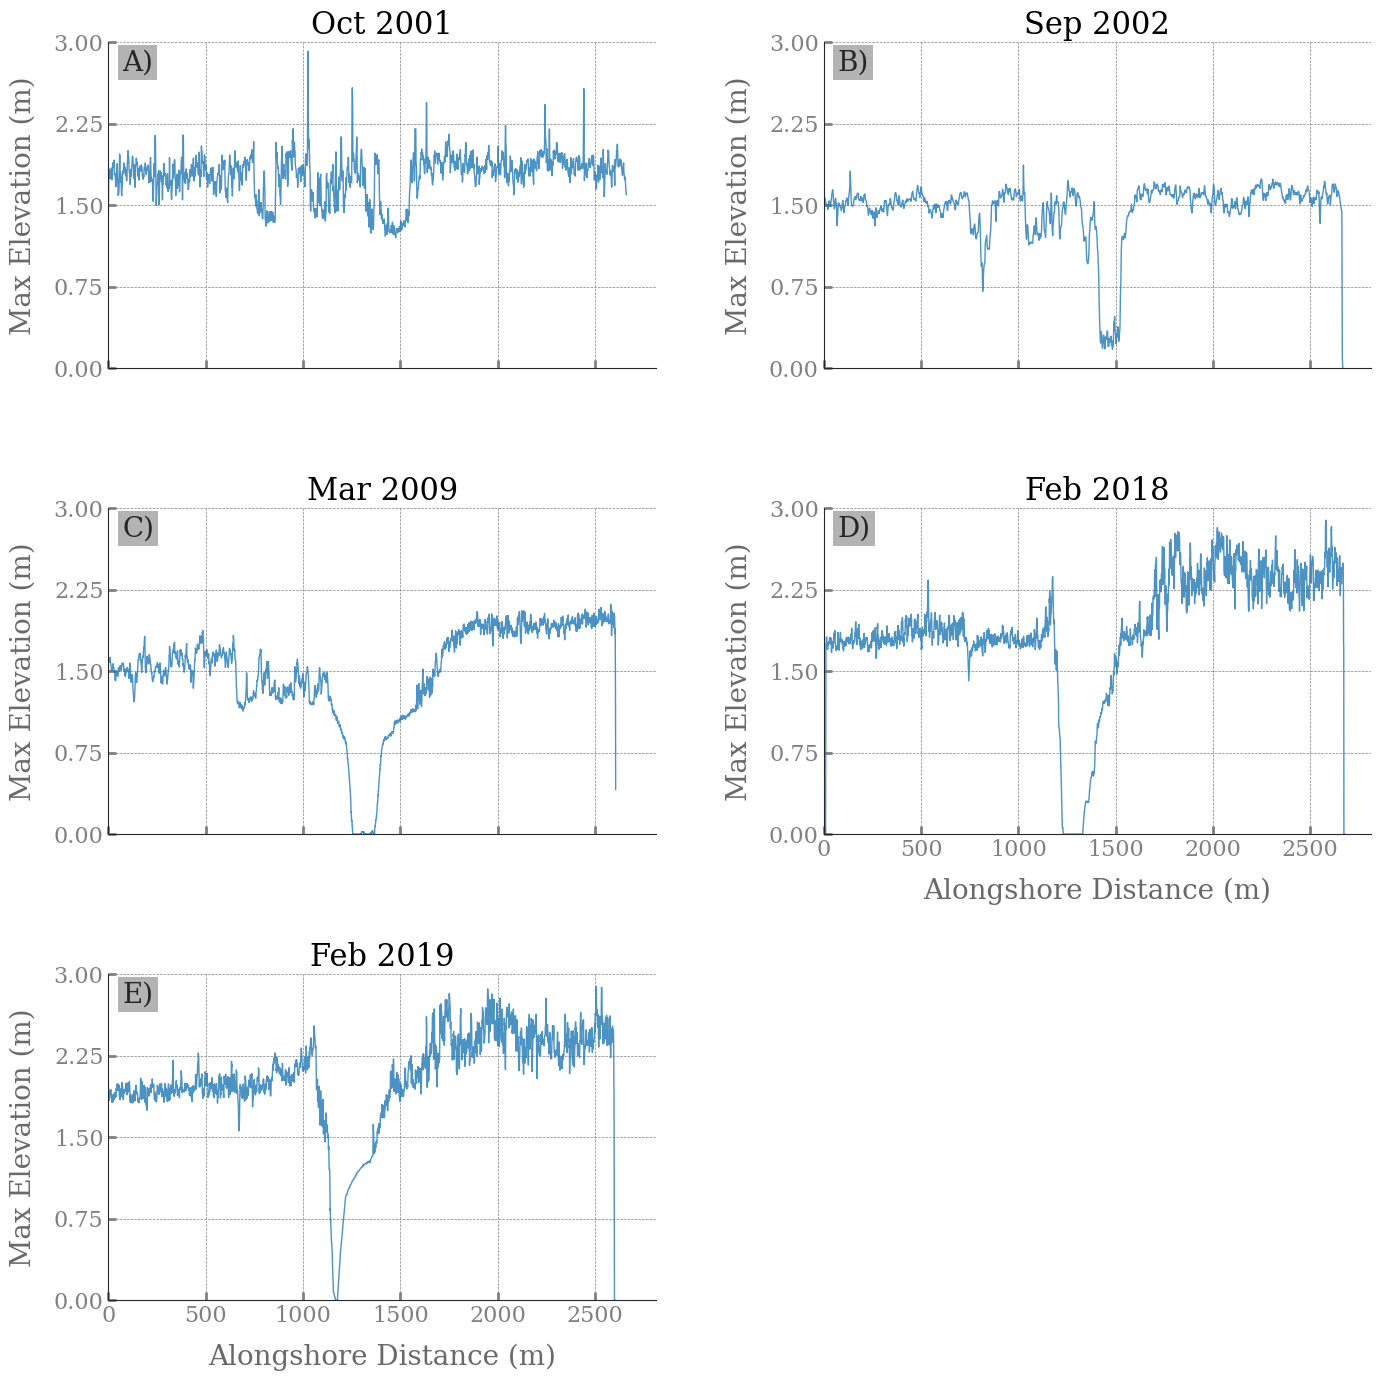

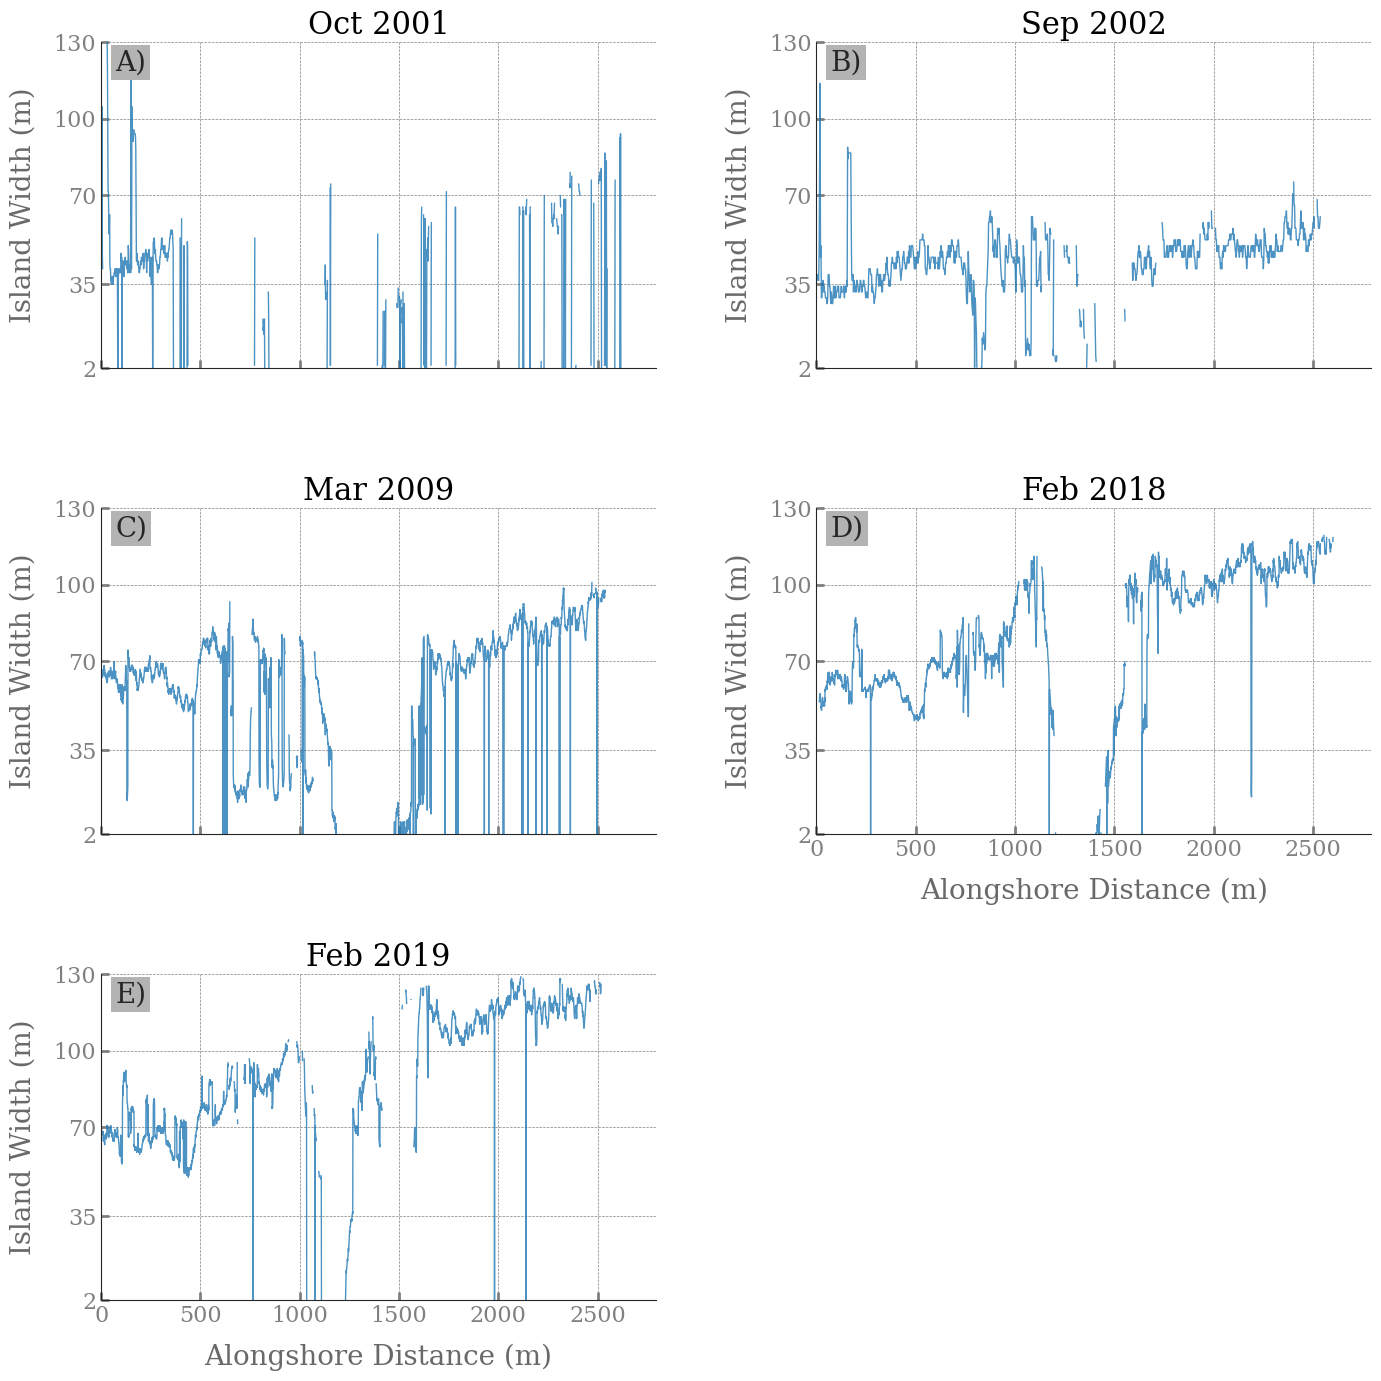

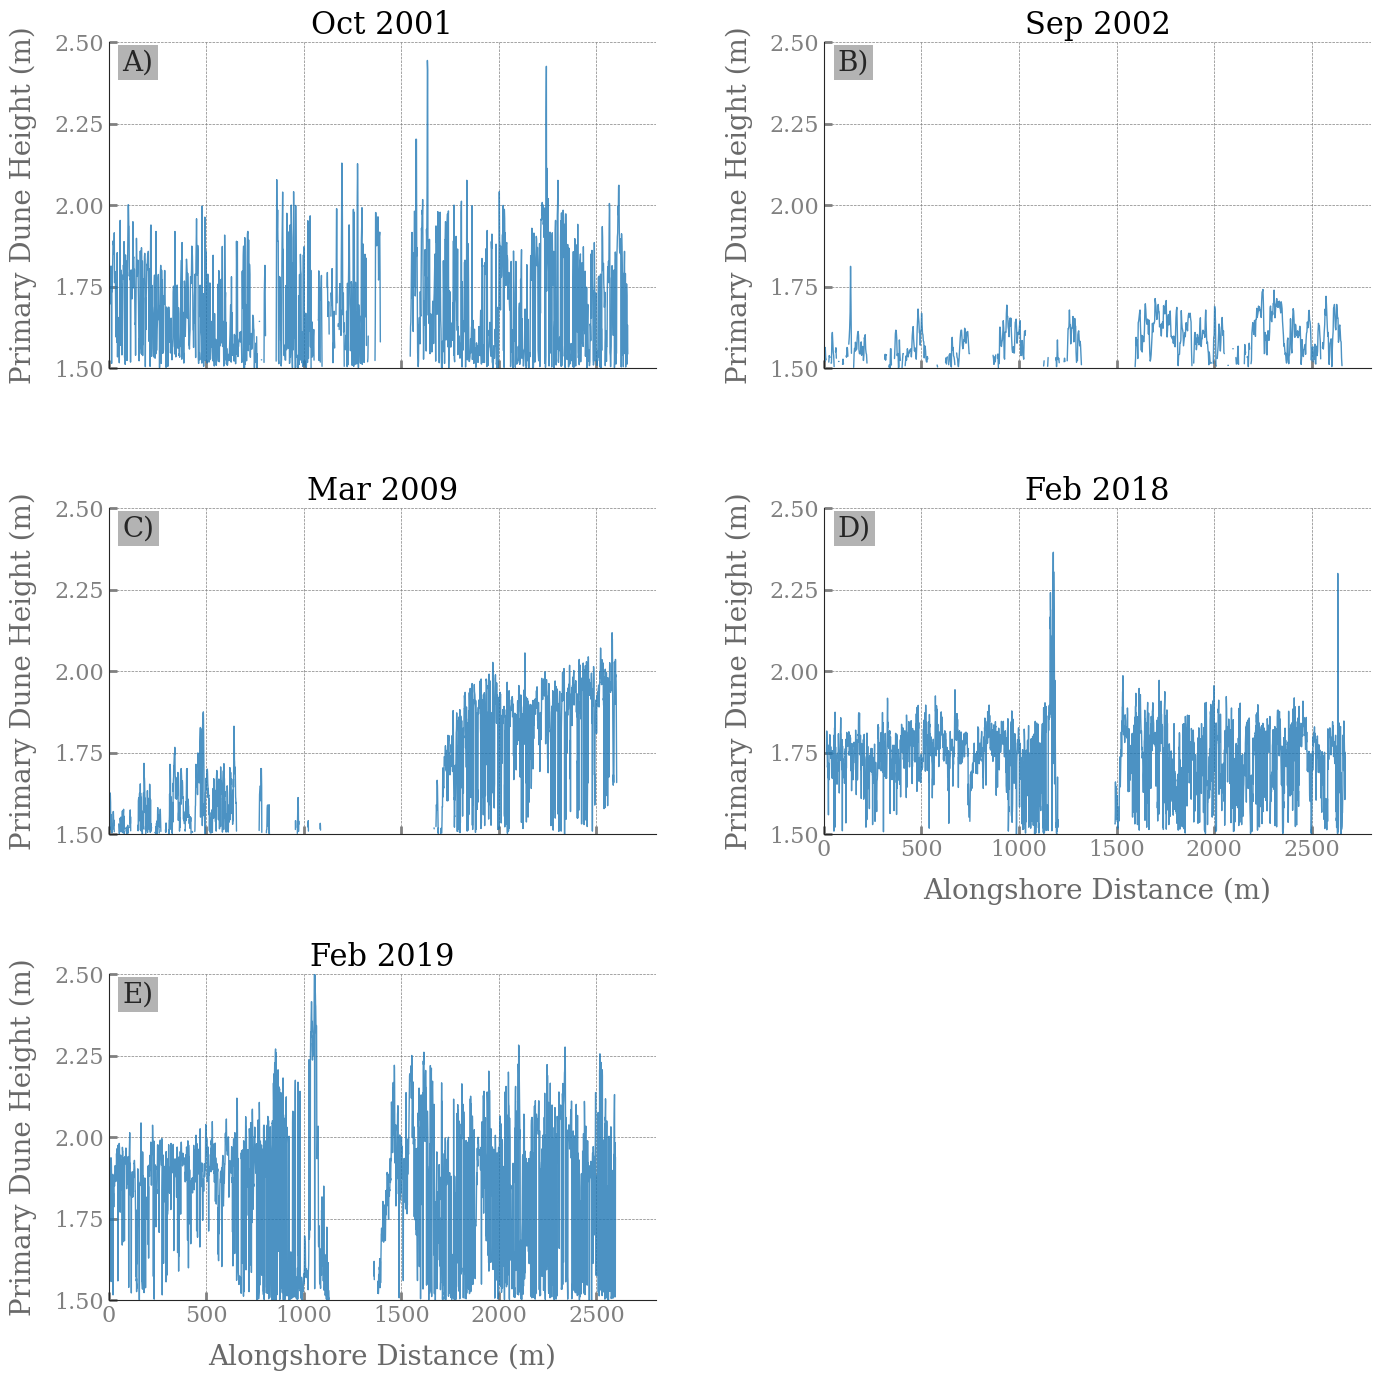

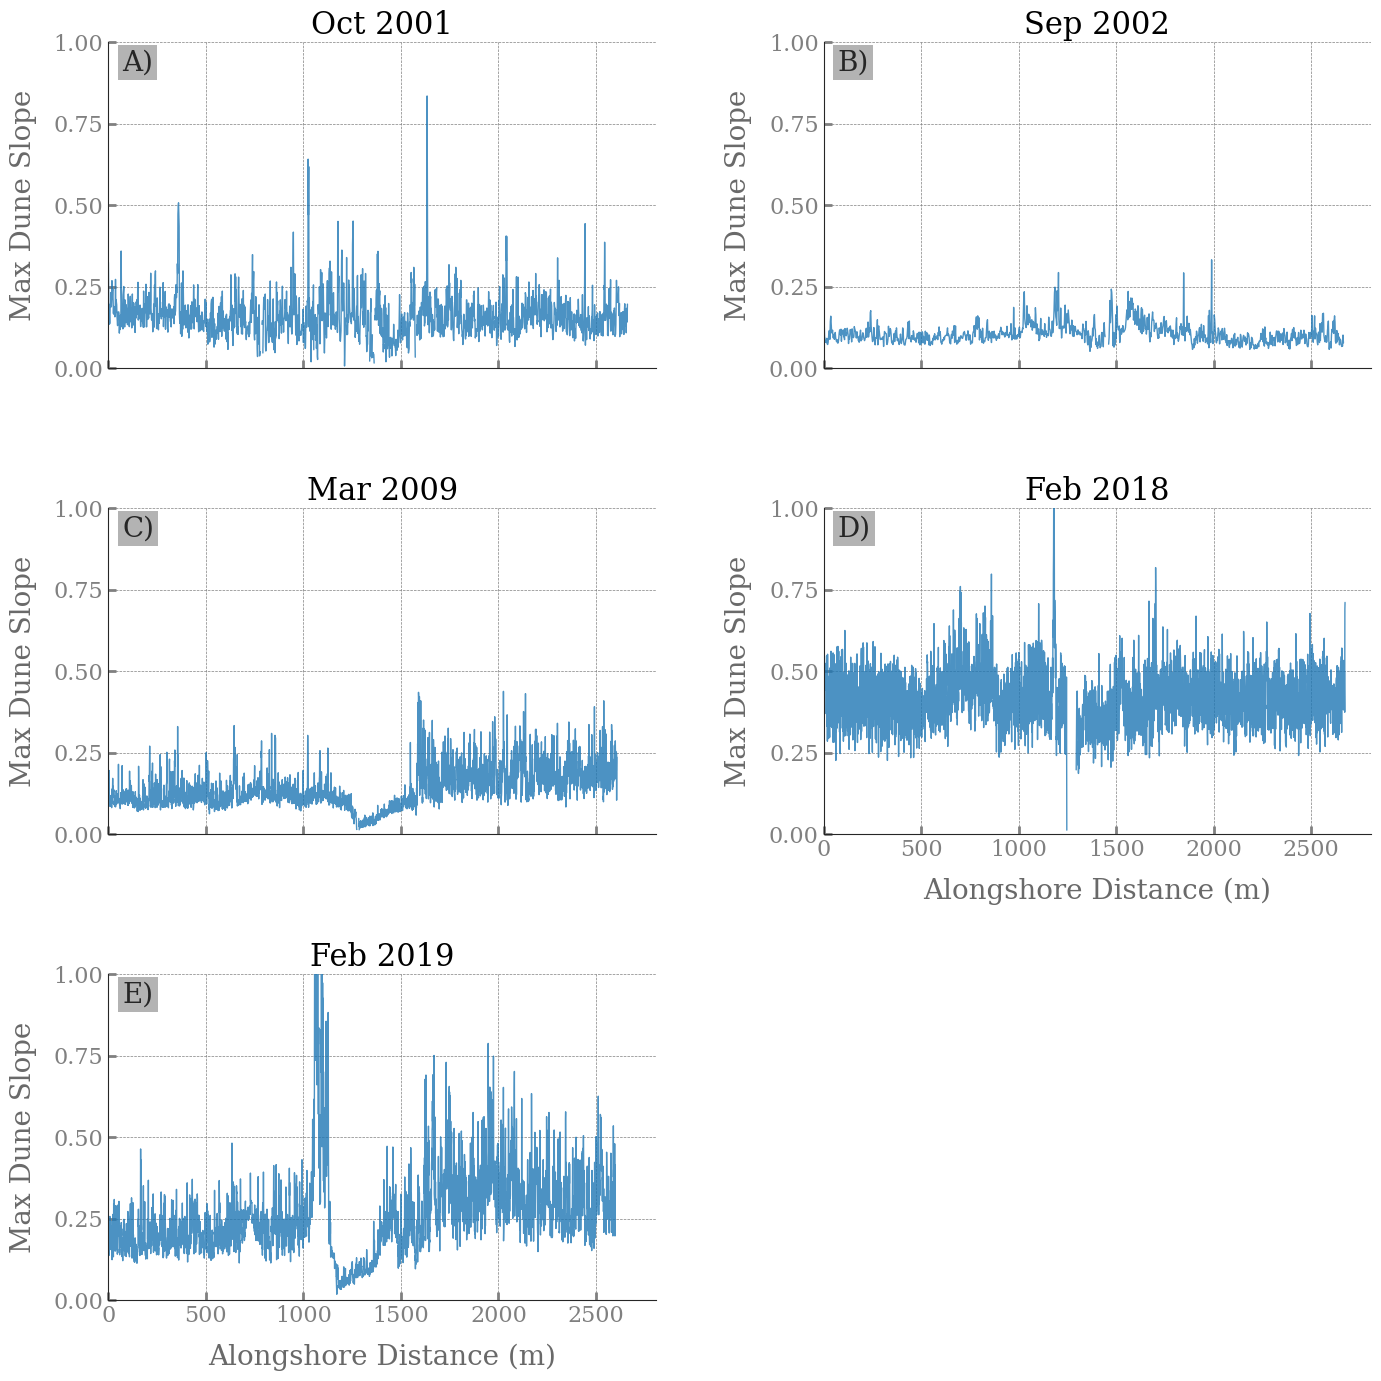

In [5]:
import matplotlib.transforms as mtransforms
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

island_parameters = [
    "Max Elevation (m)",
    "Island Width (m)",
    "Primary Dune Height (m)",
    "Max Dune Slope",
]

labels = ["A)", "B)", "C)", "D)", "E)", "F)"]

for parameter in island_parameters:
    g = sns.relplot(
        data=island_df,
        x="Alongshore Distances (m)",
        y=parameter,
        col="DEM",
        kind="line",
        col_wrap=2,
        linewidth=1,
        alpha=0.8,
        facet_kws={"sharex": True, "sharey": False},
        height=5,
        aspect=1.5,
    )
    g.set_titles("{col_name}", size=22, color="k")
    g.set_axis_labels("Alongshore Distance (m)", parameter)
    g.fig.subplots_adjust(top=0.95, hspace=0.7, wspace=0.3)  # Adjusted wspace for better spacing between plots

    if parameter == "Primary Dune Height (m)":
        ylim = (1.5, 2.5)
    elif parameter == "Island Width (m)":
        ylim = (2, 130)
    elif parameter == "Max Dune Slope":
        ylim = (0, 1)
    elif parameter == "Max Elevation (m)":
        ylim = (0, 3)

    num_ticks = 5
    ticks = np.linspace(ylim[0], ylim[1], num_ticks)
    if parameter == "Island Width (m)":
        ticks = [ylim[0], 35, 70, 100, ylim[1]]

    for ax, label in zip(g.axes.flat, labels):
        ax.set_xlabel("Alongshore Distance (m)", labelpad=12)
        ax.set_ylabel(parameter, labelpad=12)
        ax.set_ylim(ylim)
        ax.yaxis.set_major_locator(ticker.FixedLocator(ticks))
        ax.set_xlim(left=0)

        # Adding labels
        trans = mtransforms.ScaledTranslation(10 / 72, -5 / 72, g.fig.dpi_scale_trans)
        ax.text(
            0.0,
            1.0,
            label,
            transform=ax.transAxes + trans,
            fontsize="20",
            verticalalignment="top",
            fontfamily="serif",
            bbox=dict(facecolor="0.7", edgecolor="none", pad=3.0),
        )

    plt.tight_layout(pad=5)
    g.savefig(f"Results/DuneFeatures_Width_Height_Slope/Plots/{parameter}_vs_alongshore.png", dpi=300)
    plt.show()


In [6]:
def plot_raincloud(
    categorical_parameter,
    numerical_parameter,
    data,
    sigma=0.5,
    ort="h",
    pal="Set2",
    filename="raincloud_plot.png",
):
    fig, ax = plt.subplots(figsize=(10, 10))
    pt.RainCloud(
        x=categorical_parameter,
        y=numerical_parameter,
        data=data,
        bw=sigma,
        width_viol=1.2,
        width_box=0.15,
        orient=ort,
        move=0.0,
        palette=pal,
        pointplot=True,
        point_size=0.01,
        box_showfliers=True,
        box_flierprops={"markerfacecolor": "b", "marker": "o", "markersize": 3},
    )

    ax.set_ylabel("")
    # ax.set_xlabel("Max Elevation(m)")
    ax.set_xlabel(numerical_parameter)
    plt.tight_layout()
    if numerical_parameter == "Max Dune Slope":
        ax.set_xlim(0, 0.7)
        
    if numerical_parameter == "dh/dt(m/yr)":
        ax.set_xlim(-0.8, 0.8)

    plt.savefig(filename, dpi=300)
    # plt.close()
    plt.show()


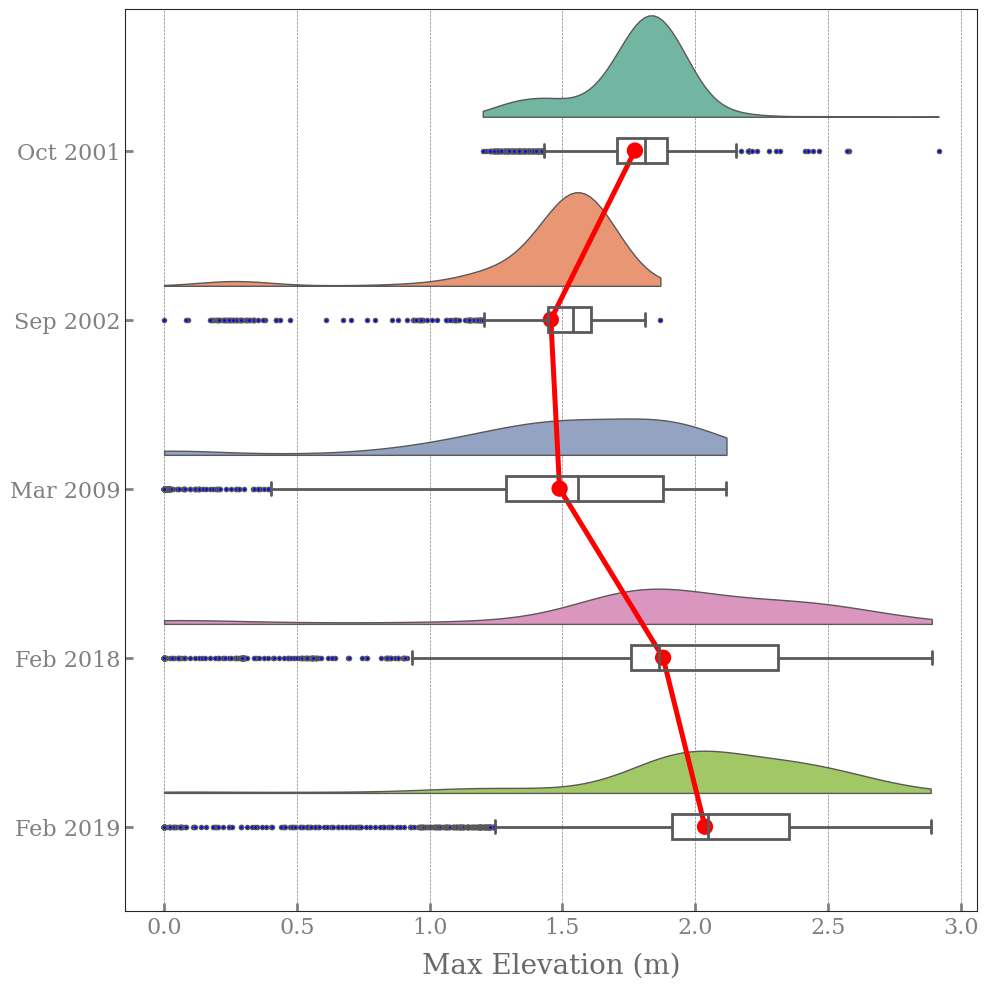

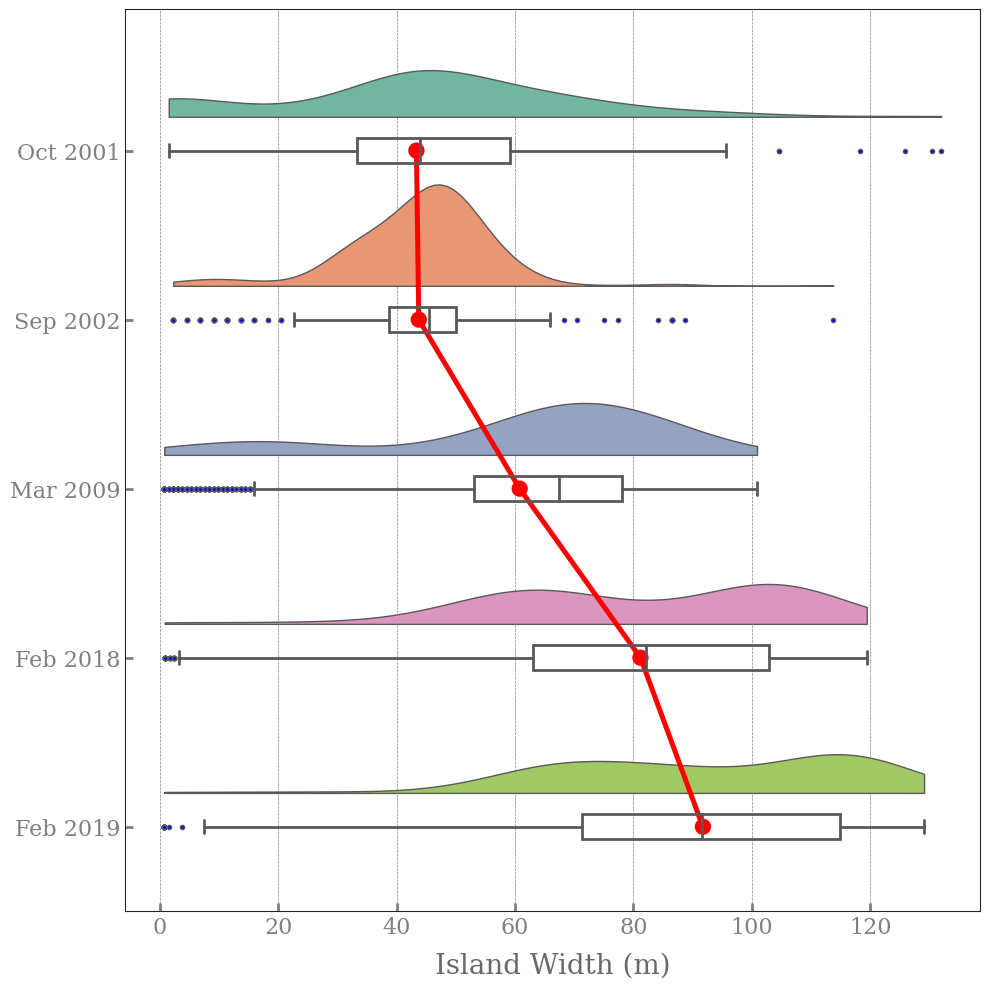

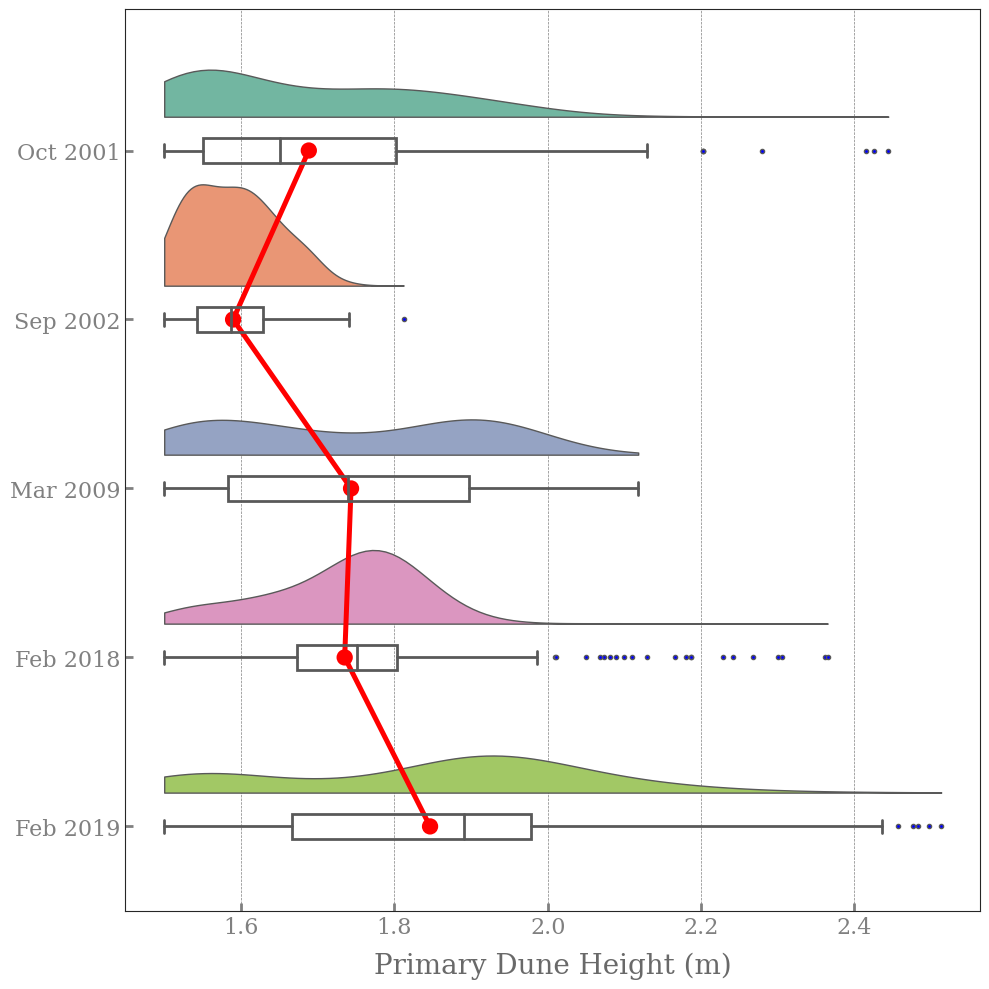

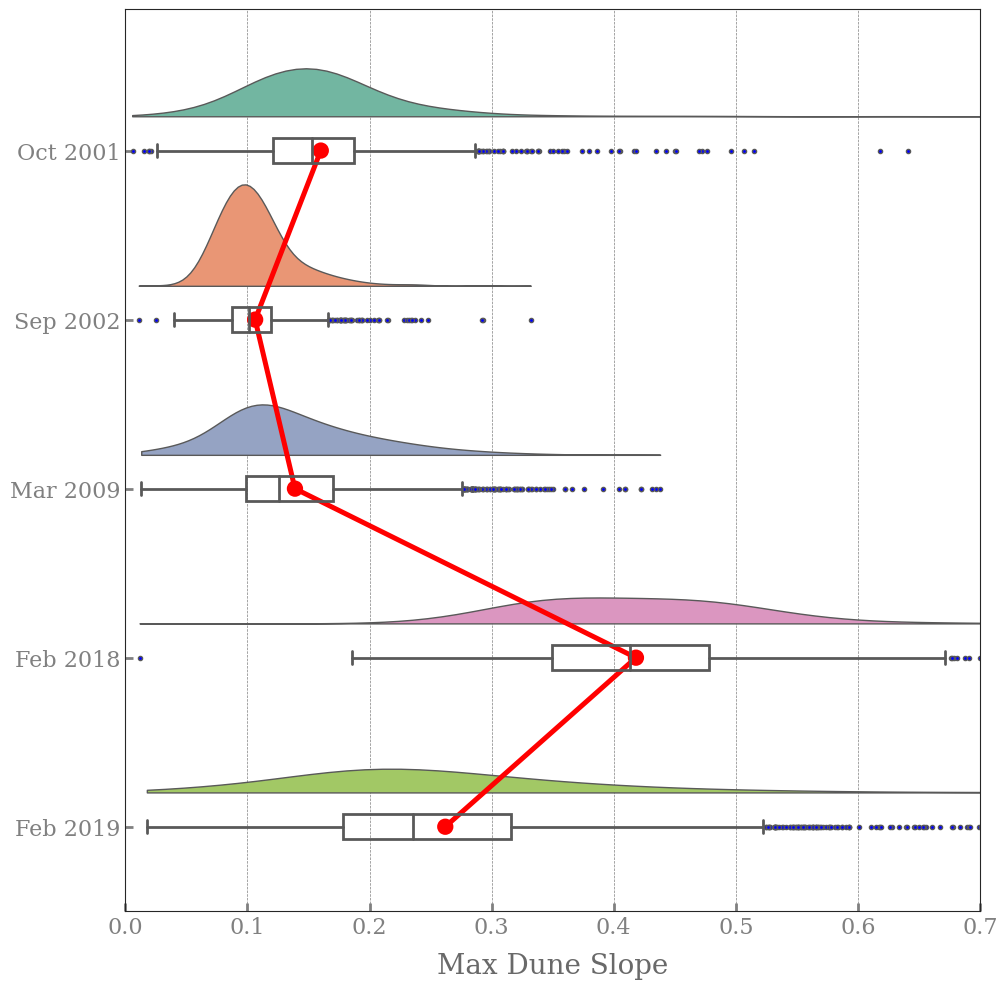

In [7]:
for parameter in island_parameters:
    plot_raincloud(
        categorical_parameter="DEM",
        numerical_parameter=parameter,
        data=island_df,
        sigma=0.4,
        filename=f"Results/DuneFeatures_Width_Height_Slope/{parameter}_raincloud_plot.png",
    )


In [8]:
def find_max_values_and_width_and_distance(dunes, key):
    max_value = 0
    dune_width = None
    total_distance = 0
    distance_to_max = 0
    for i, dune in enumerate(dunes):
        value = dune.get(key) if dune.get(key) is not None else 0
        if "distance_to_previous_dune" in dune and i > 0:
            total_distance += dune["distance_to_previous_dune"]
        if value > max_value and (i == 0 or total_distance < 30):
            max_value = value
            dune_width = dune.get("dune_width", None)
            distance_to_max = total_distance
    return max_value, dune_width, distance_to_max


def process_json_data(file_path):
    with open(file_path, "r") as file:
        data = json.load(file)

    results = []
    for item in data:
        primary_dune_height = item["dunes"][0]["dune_height"] if item["dunes"] else None
        primary_dune_width = item["dunes"][0]["dune_width"] if item["dunes"] else None
        max_dune_height, max_dune_height_width, distance_to_max = (
            find_max_values_and_width_and_distance(item["dunes"], "dune_height")
        )
        max_slope, _, _ = find_max_values_and_width_and_distance(
            item["dunes"], "max_slope"
        )
        distance_between_primary_and_max = None
        if primary_dune_height != max_dune_height:
            distance_between_primary_and_max = distance_to_max
        result = {
            "Cross Section": item["cross_section"],
            "Alongshore Distance (m)": item["alongshoreDistance"],
            "Primary Dune Height (m)": primary_dune_height,
            "Primary Dune Width (m)": primary_dune_width,
            "Maximum Dune Height (m)": max_dune_height,
            "Maximum Dune Width (m)": max_dune_height_width,
            "Maximum Slope": max_slope,
            "Distance Between Primary and Maximum Dune (m)": distance_between_primary_and_max,
            "Max Elevation (m)": item["max_elevation"],
        }
        results.append(result)
    return results


def build_combined_df(dems):
    combined_df = pd.DataFrame()
    for dem in dems:
        file_path = f"Results/DuneFeatures_Width_Height_Slope/Data/duneCharacteristics_{dem.replace(' ', '_')}.json"
        temp_data = process_json_data(file_path)
        temp_df = pd.DataFrame(temp_data)
        temp_df["DEM"] = dem
        combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

    combined_df["DEM"] = combined_df["DEM"].map(dem_date_map)

    return combined_df


dune_df = build_combined_df(dems)


In [9]:
profile = ProfileReport(dune_df, title="Profiling Report")


In [10]:
# msno.matrix(dune_df)


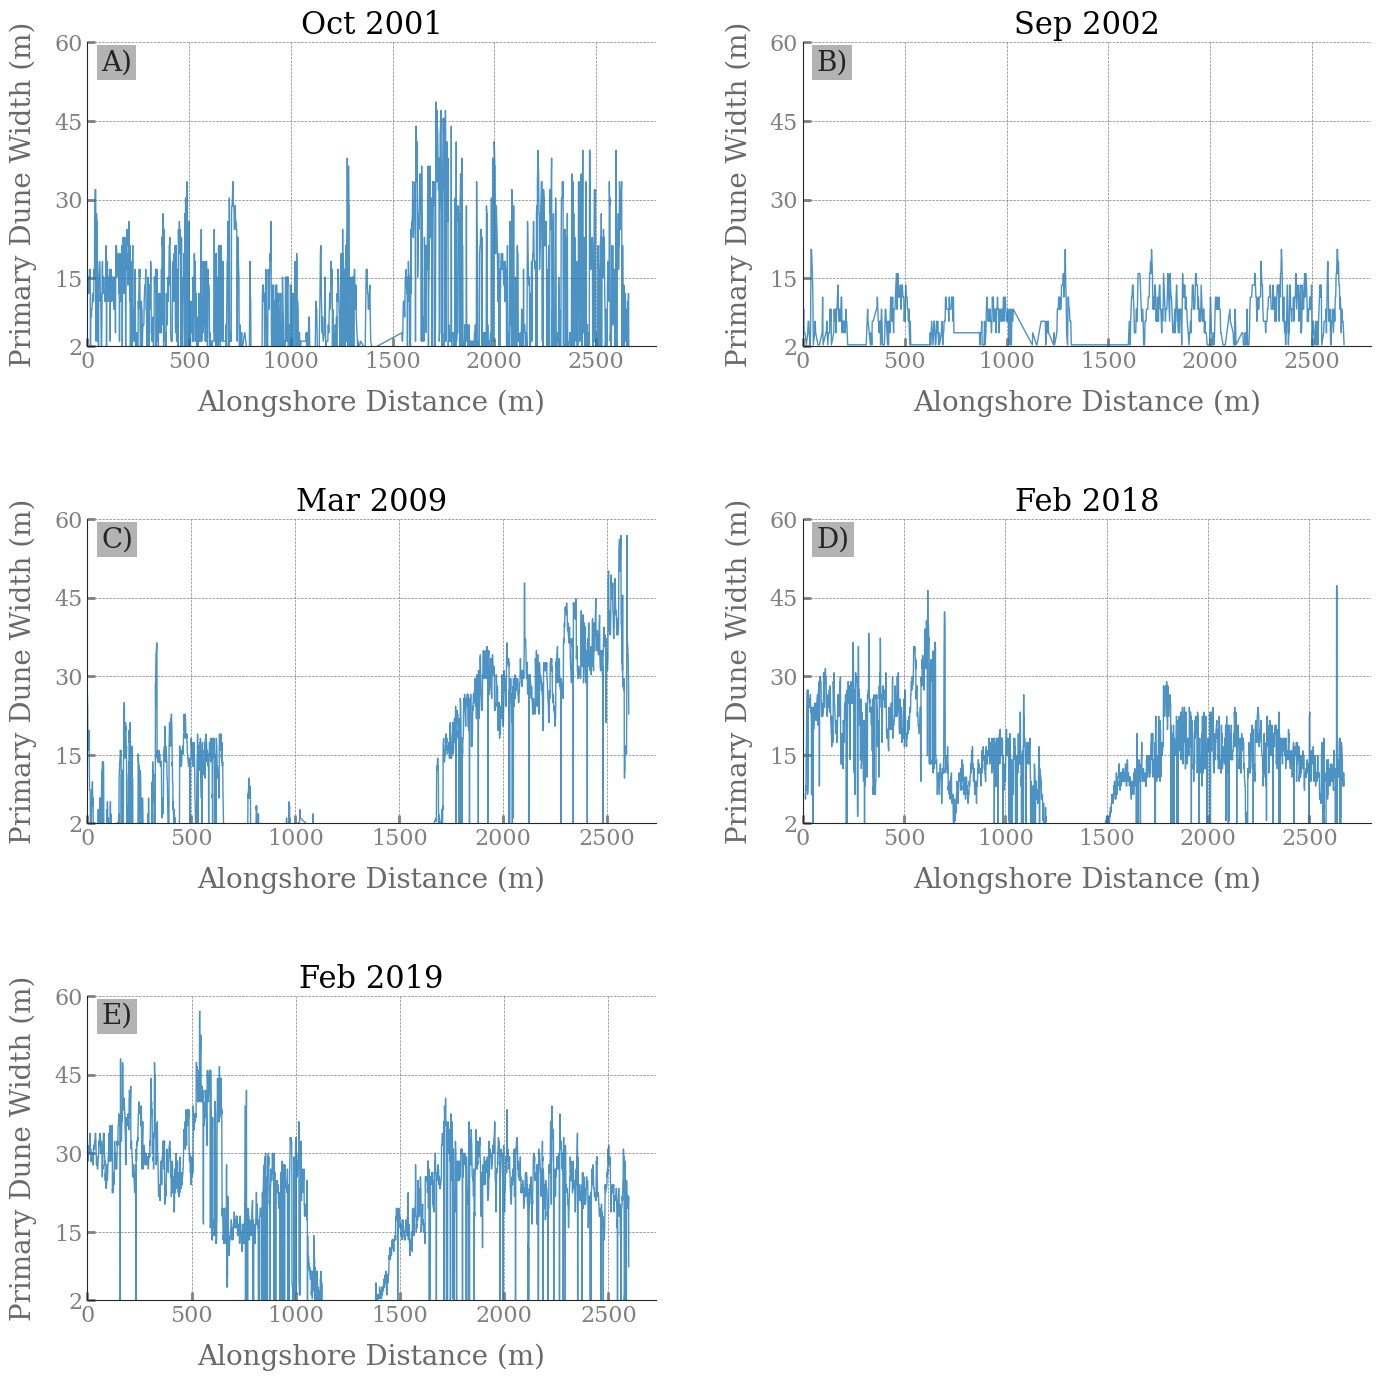

In [11]:
import matplotlib.transforms as mtransforms
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

dune_parameters = [
    # "Primary Dune Height(m)",
    "Primary Dune Width (m)",
    # "Maximum Dune Height(m)",
    # "Maximum Dune Width(m)",
    # "Maximum Slope",
]

labels = ["A)", "B)", "C)", "D)", "E)", "F)"]

for parameter in dune_parameters:
    g = sns.relplot(
        data=dune_df,
        x="Alongshore Distance (m)",
        y=parameter,
        col="DEM",
        kind="line",
        col_wrap=2,
        linewidth=1,
        alpha=0.8,
        facet_kws={"sharex": False, "sharey": False},
        height=5,
        aspect=1.5,
    )
    g.set_titles("{col_name}", size=22, color="k")
    g.set_axis_labels("Alongshore Distance (m)", parameter)
    g.fig.tight_layout(pad=5)

    if parameter == "Primary Dune Height (m)":
        ylim = (1.5, 2.5)
    elif parameter == "Primary Dune Width (m)":
        ylim = (2, 60)
    elif parameter == "Maximum Slope":
        ylim = (0, 1)

    num_ticks = 5
    ticks = np.linspace(ylim[0], ylim[1], num_ticks)
    if parameter == "Primary Dune Width (m)":
        ticks = [ylim[0], 15, 30, 45, ylim[1]]

    for ax, label in zip(g.axes.flat, labels):
        ax.set_xlabel("Alongshore Distance (m)", labelpad=12)
        ax.set_ylabel(parameter, labelpad=12)
        ax.set_ylim(ylim)
        ax.yaxis.set_major_locator(ticker.FixedLocator(ticks))
        ax.set_xlim(left=0)

        # Adding labels
        trans = mtransforms.ScaledTranslation(10 / 72, -5 / 72, g.fig.dpi_scale_trans)
        ax.text(
            0.0,
            1.0,
            label,
            transform=ax.transAxes + trans,
            fontsize="20",
            verticalalignment="top",
            fontfamily="serif",
            bbox=dict(facecolor="0.7", edgecolor="none", pad=3.0),
        )

    g.fig.subplots_adjust(top=0.95, hspace=0.7, wspace=3)
    plt.tight_layout(pad=5)
    g.savefig(f"Results/DuneFeatures_Width_Height_Slope/Plots/{parameter}_vs_alongshore.png", dpi=300)
    plt.show()


In [12]:
dune_parameters


['Primary Dune Width (m)']

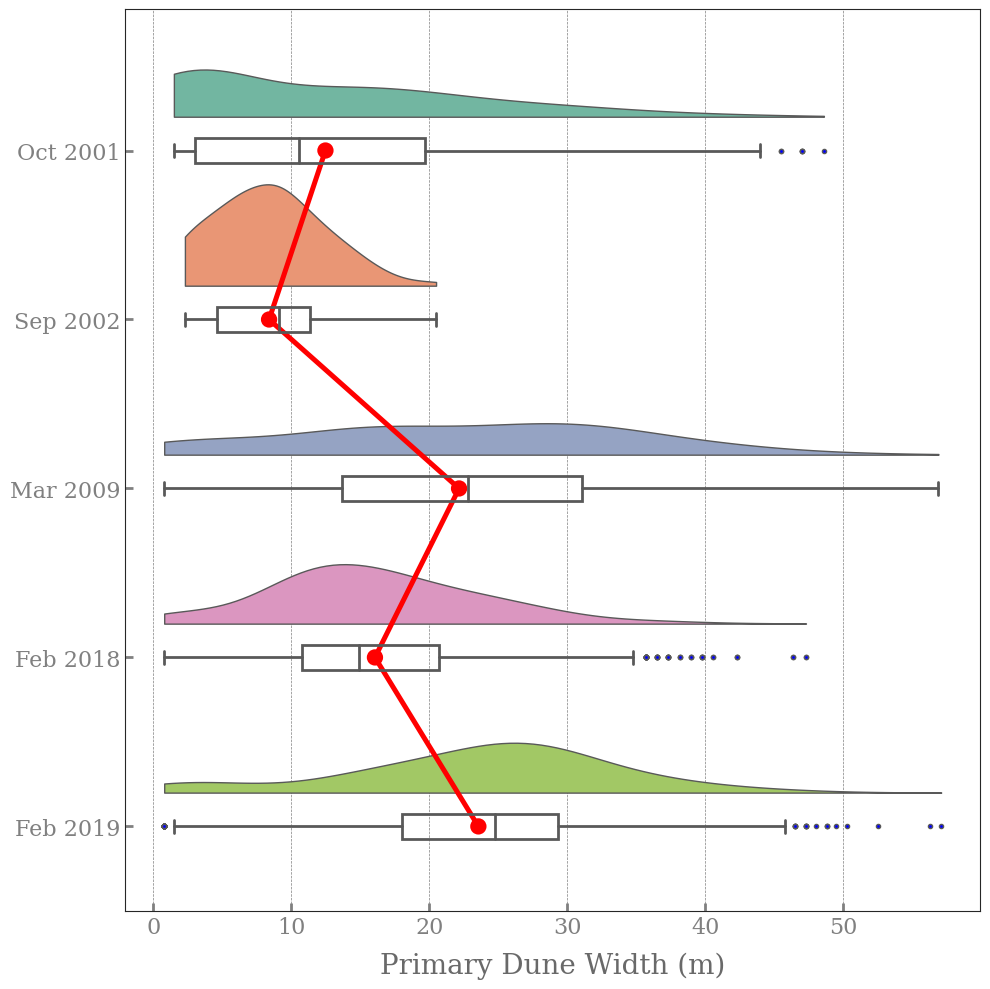

In [13]:
for parameter in dune_parameters:
    plot_raincloud(
        categorical_parameter="DEM",
        numerical_parameter=parameter,
        data=dune_df,
        sigma=0.4,
        filename=f"Results/DuneFeatures_Width_Height_Slope/Plots/{parameter}_raincloud_plot.png",
    )


In [14]:
dem_dates = {
    "Oct 2001": "10/13/01",
    "Sep 2002": "9/18/02",
    "Mar 2009": "3/15/09",
    "Feb 2018": "2/16/18",
    "Feb 2019": "2/9/19",
}


for key in dem_dates:
    dem_dates[key] = datetime.strptime(dem_dates[key], "%m/%d/%y")

sorted_dem_years = sorted(dem_dates, key=dem_dates.get)

results_df = pd.DataFrame(
    columns=[
        "Alongshore Distance (m)",
        "ElevationYear1",
        "ElevationYear2",
        "dh/dt",
        "Year1-Year2",
    ]
)

for i in range(len(sorted_dem_years) - 1):
    year1 = sorted_dem_years[i]
    year2 = sorted_dem_years[i + 1]

    dt1 = dem_dates[year1]
    dt2 = dem_dates[year2]

    time_diff_years = (dt2 - dt1).days / 365.25

    df_year1 = island_df[island_df["DEM"] == year1][
        ["Alongshore Distances (m)", "Max Elevation (m)"]
    ]
    df_year2 = island_df[island_df["DEM"] == year2][
        ["Alongshore Distances (m)", "Max Elevation (m)"]
    ]

    valid_mask = df_year1["Alongshore Distances (m)"].apply(
        lambda x: df_year2["Alongshore Distances (m)"][
            df_year2["Alongshore Distances (m)"] < x
        ].any()
        and df_year2["Alongshore Distances (m)"][
            df_year2["Alongshore Distances (m)"] > x
        ].any()
    )
    valid_alongshoreDistances = df_year1["Alongshore Distances (m)"][valid_mask]

    interpolated_heights_valid = np.interp(
        valid_alongshoreDistances,
        df_year2["Alongshore Distances (m)"],
        df_year2["Max Elevation (m)"],
    )

    rate_of_change = (
        interpolated_heights_valid - df_year1["Max Elevation (m)"][valid_mask].values
    ) / time_diff_years

    temp_df = pd.DataFrame(
        {
            "Alongshore Distance (m)": valid_alongshoreDistances,
            "ElevationYear1": df_year1["Max Elevation (m)"][valid_mask].values,
            "ElevationYear2": interpolated_heights_valid,
            "dh/dt(m/yr)": rate_of_change,
            "Year1-Year2": f"{year1} - {year2}",
        }
    )

    results_df = pd.concat([results_df, temp_df], ignore_index=True)


In [15]:
results_df


Alongshore Distance (m)  ElevationYear1  ElevationYear2 dh/dt  \
0                       3.034           1.808        1.522001   NaN   
1                       4.552           1.802        1.520000   NaN   
2                       6.069           1.782        1.548673   NaN   
3                       7.586           1.798        1.552662   NaN   
4                       9.103           1.743        1.532000   NaN   
...                       ...             ...             ...   ...   
9458                 2601.816           2.492        0.000000   NaN   
9459                 2602.645           2.550        0.000000   NaN   
9460                 2603.474           2.557        0.000000   NaN   
9461                 2604.304           2.589        0.000000   NaN   
9462                 2605.133           2.554        0.000000   NaN   

              Year1-Year2  dh/dt(m/yr)  
0     Oct 2001 - Sep 2002    -0.307239  
1     Oct 2001 - Sep 2002    -0.302943  
2     Oct 2001 - Sep 2002    -0.250655  
3     Oct 2001 - Sep 2002    -0.263558  
4     Oct 2001 - Sep 2002    -0.226670  
...                   ...          ...  
9458  Feb 2018 - Feb 2019    -2.542466  
9459  Feb 2018 - Feb 2019    -2.601641  
9460  Feb 2018 - Feb 2019    -2.608783  
9461  Feb 2018 - Feb 2019    -2.641431  
9462  Feb 2018 - Feb 2019    -2.605722  

[9463 rows x 6 columns]

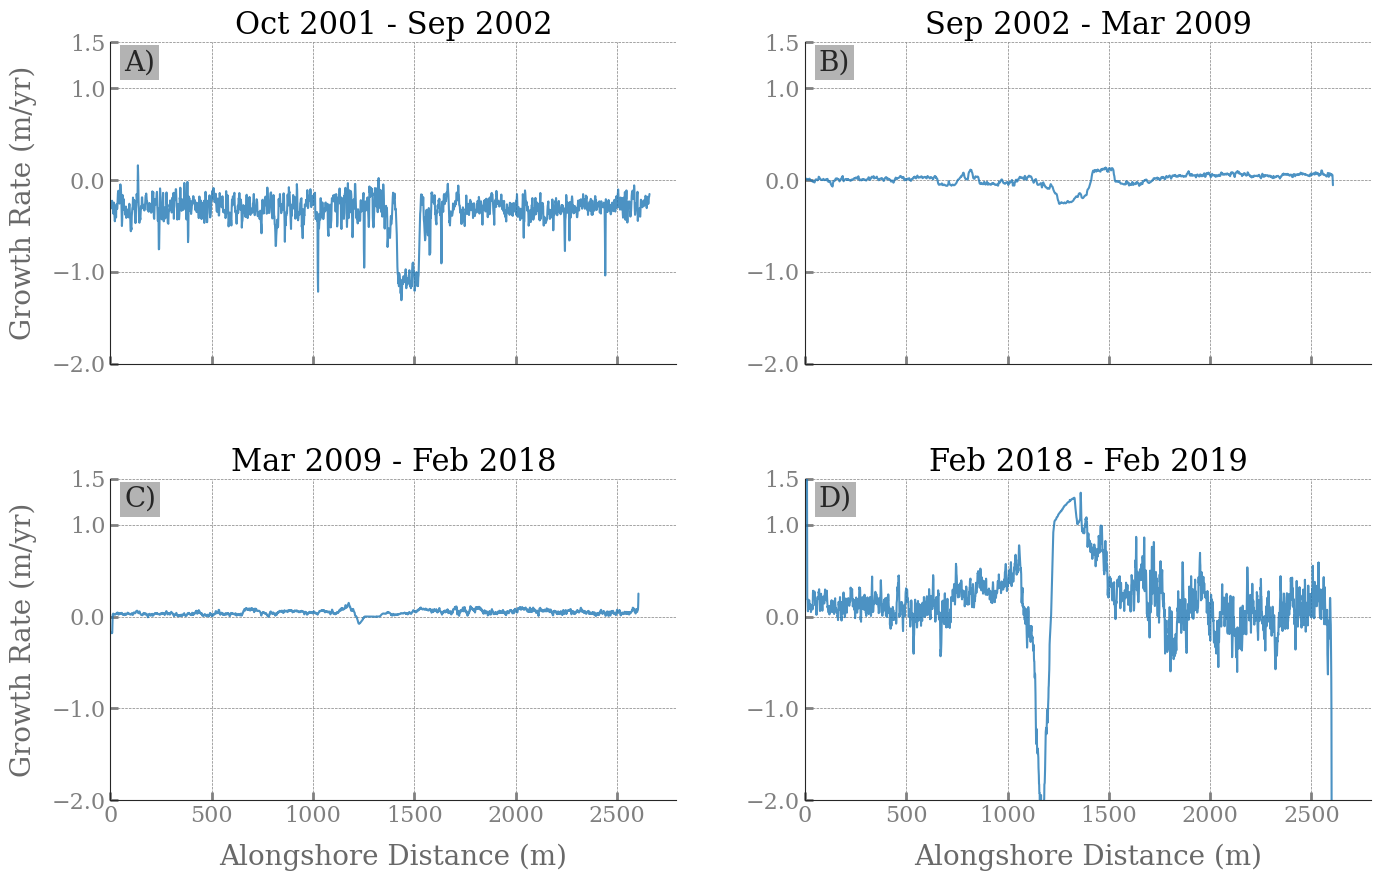

In [16]:

labels = ["A)", "B)", "C)", "D)", "E)", "F)"]

g = sns.relplot(
    data=results_df,
    x="Alongshore Distance (m)",
    y="dh/dt(m/yr)",
    col="Year1-Year2",
    kind="line",
    linewidth=1.5,
    alpha=0.8,
    col_wrap=2,
    facet_kws={"sharex": True, "sharey": False},
    height=5,
    aspect=1.5,
)

g.set_axis_labels("Alongshore Distance (m)", "Growth Rate (m/yr)")
g.set_titles("{col_name}", size=22, color="k")

ylim = (-2, 1.5)
ticks = [-2, -1, 0, 1, 1.5]
for ax, label in zip(g.axes.flat, labels):
    ax.set_xlabel("Alongshore Distance (m)", labelpad=12)
    ax.set_ylim(ylim)
    ax.yaxis.set_major_locator(ticker.FixedLocator(ticks))
    ax.set_xlim(left=0)

    # Adding labels
    trans = mtransforms.ScaledTranslation(10 / 72, -5 / 72, g.fig.dpi_scale_trans)
    ax.text(
        0.0,
        1.0,
        label,
        transform=ax.transAxes + trans,
        fontsize="20",
        verticalalignment="top",
        fontfamily="serif",
        bbox=dict(facecolor="0.7", edgecolor="none", pad=3.0),
    )

g.fig.subplots_adjust(top=0.95, hspace=0.7, wspace=3)
g.fig.tight_layout(pad=5)

g.savefig(
    f"Results/DuneFeatures_Width_Height_Slope/Plots/growthRate_vs_alongshore.png",
    dpi=300,
)

plt.show()


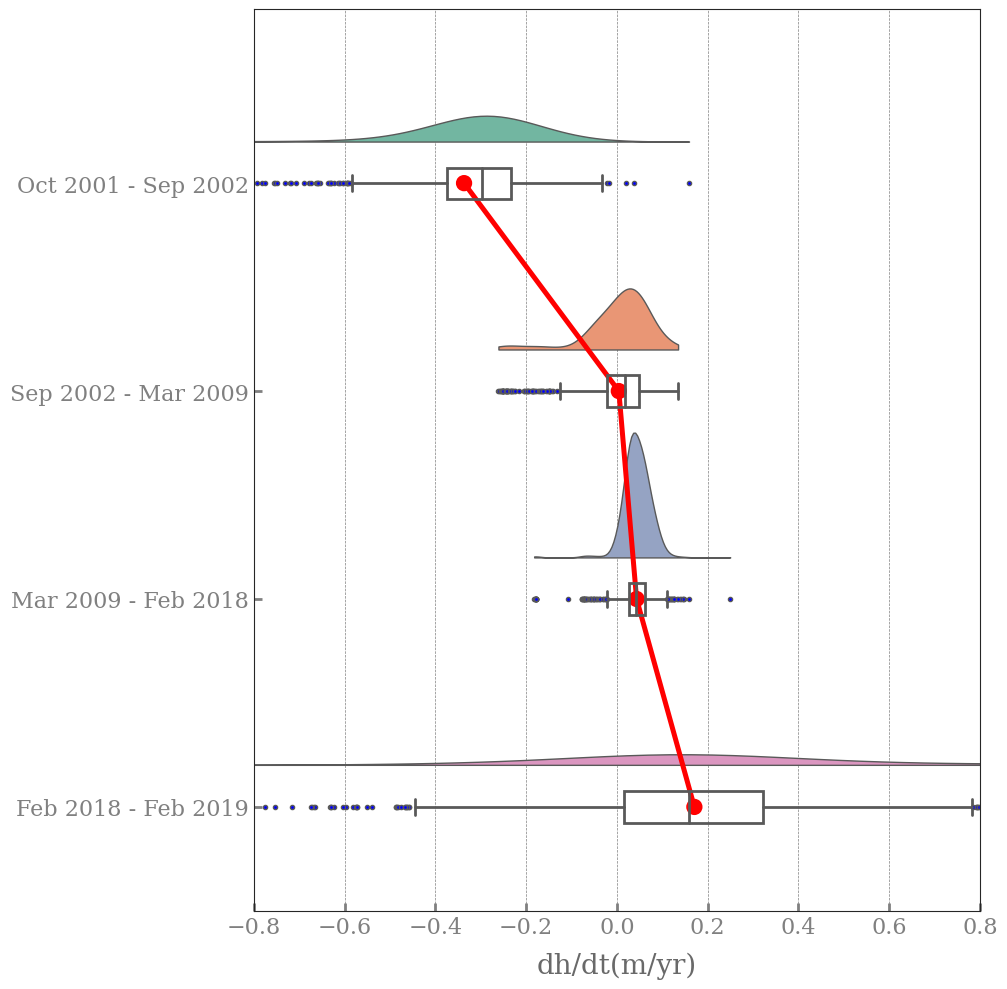

In [17]:
plot_raincloud(
    categorical_parameter="Year1-Year2",
    numerical_parameter="dh/dt(m/yr)",
    data=results_df,
    sigma=0.4,
    filename=f"Results/DuneFeatures_Width_Height_Slope/dune_growth_rate_raincloud_plot.png",
)


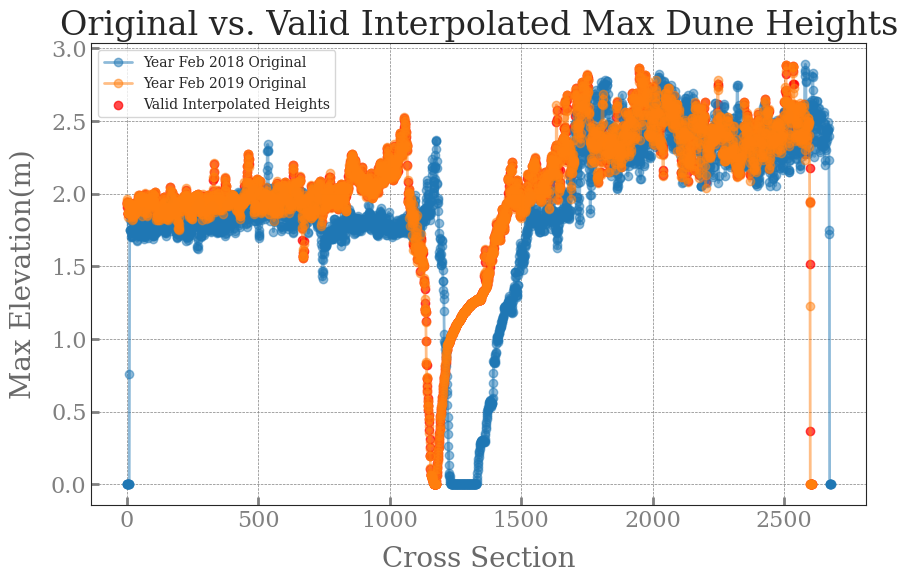

In [18]:
# Mask for values to interpolate: only interpolate where there are values before and after
cross_sections_year1 = df_year1["Alongshore Distances (m)"]
cross_sections_year2 = df_year2["Alongshore Distances (m)"]

# Create a boolean mask for df_year1's cross sections where interpolation is valid
valid_mask = cross_sections_year1.apply(
    lambda x: cross_sections_year2[cross_sections_year2 < x].any()
    and cross_sections_year2[cross_sections_year2 > x].any()
)

# Applying the mask to keep only valid points for interpolation
valid_cross_sections = cross_sections_year1[valid_mask]

# Interpolating heights for these valid points
interpolated_heights_valid = np.interp(
    valid_cross_sections,
    df_year2["Alongshore Distances (m)"],
    df_year2["Max Elevation (m)"],
)

plt.figure(figsize=(10, 6))
plt.plot(
    df_year1["Alongshore Distances (m)"],
    df_year1["Max Elevation (m)"],
    "o-",
    label=f"Year {year1} Original",
    alpha=0.5,
)
plt.plot(
    df_year2["Alongshore Distances (m)"],
    df_year2["Max Elevation (m)"],
    "o-",
    label=f"Year {year2} Original",
    alpha=0.5,
)
plt.scatter(
    valid_cross_sections,
    interpolated_heights_valid,
    c="red",
    label="Valid Interpolated Heights",
    alpha=0.7,
)

plt.title("Original vs. Valid Interpolated Max Dune Heights")
plt.xlabel("Cross Section")
plt.ylabel("Max Elevation(m)")
plt.legend()
plt.show()
